# Analysis of Indeed data
**Data Fest 2018 - psu**
**Team: Excellent Estimator**

Goal: Deep dive on the Indeed data set 
Approaches:
- Job distribution geographically
- Supply (employer, vs. demand (# of clicks)
- 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('datafest2018-Updated-April12.csv')

In [3]:
uniques = pd.read_csv('datafest18_unique_jobs_updated.csv')

In [4]:
def unique(df,col):
    print('# of unique levels in %s is, ' %col, df[col].nunique())

In [67]:
# Get unique job data - Resize data so that it's is more computationally efficient
unique_jobs = pd.DataFrame()
i = 0
while i <= df.shape[0]-100000:
    print(i)
    sub = df.iloc[i:i+100000]
    i = i+100000
    unique = sub.groupby('jobId', group_keys=False).apply(lambda sub: sub.sample(1))
    unique_jobs = pd.concat([unique_jobs,unique])    

    final = pd.DataFrame()
i=0
while i <= unique_jobs.shape[0]-100000:
    print(i)
    sub = unique_jobs.iloc[i:i+100000]
    i = i+100000
    unique = sub.groupby('jobId', group_keys=False).apply(lambda sub: sub.sample(1))
    final = pd.concat([final,unique])    



In [34]:
subset = df.loc[np.random.choice(df.index, 100000, replace=False)]

In [37]:
uniques = pd.read_csv('datafest18_unique_jobs_updated.csv')

In [27]:
# Calculate average clicks and average local clicks
avg_total = df.groupby('jobId')['clicks'].mean().reset_index(name='Avg_clicks') 
avg_local = df.groupby('jobId')['localClicks'].mean().reset_index(name='Avg_localClicks') 
avg = pd.merge(avg_total,avg_local,on=['jobId'])
new = pd.merge(uniques,avg,on=['jobId'])
new.to_csv('datafest18_unique_jobs_updated.csv')

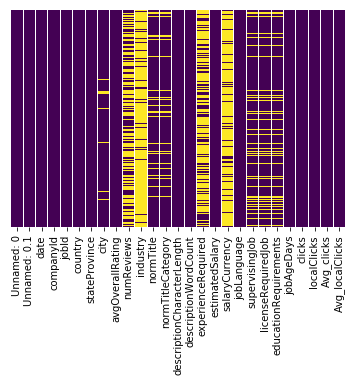

In [38]:
# To visualize the amount of missing value
sns.heatmap(uniques.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [101]:
total = df.groupby('jobId')['clicks'].sum().reset_index(name='TotalClicks')
total_local = df.groupby('jobId')['localClicks'].sum().reset_index(name='TotalLocalClicks')
age = df.groupby('jobId')['jobAgeDays'].max().reset_index(name='JobAge')
new = pd.merge(uniques,total,on=['jobId'])
new = pd.merge(new,total_local,on=['jobId'])
new = pd.merge(new,age,on=['jobId'])
new.drop(['Unnamed: 0','Unnamed: 0.1','TotalClicks_y','jobAgeDays'],1,inplace=True)
new['numReviews'].fillna(value=0,inplace=True)
new.drop('TotalLocalClicks_x',1,inplace=True)
new.columns = ['date', 'companyId', 'jobId', 'country', 'stateProvince', 'city',
       'avgOverallRating', 'numReviews', 'industry', 'normTitle',
       'normTitleCategory', 'descriptionCharacterLength',
       'descriptionWordCount', 'experienceRequired', 'estimatedSalary',
       'salaryCurrency', 'jobLanguage', 'supervisingJob', 'licenseRequiredJob',
       'educationRequirements', 'clicks', 'localClicks',
       'Avg_clicks', 'Avg_localClicks', 'TotalClicks', 'JobAge','TotalLocalClicks']
new.to_csv('datafest18_unique_jobs_updated.csv')

In [112]:
df.head()

,date,companyId,jobId,country,stateProvince,city,avgOverallRating,numReviews,industry,normTitle,...,estimatedSalary,salaryCurrency,jobLanguage,supervisingJob,licenseRequiredJob,educationRequirements,jobAgeDays,clicks,localClicks,month
0,2016-11-01,company00000,job0000000,CA,ON,Cambridge,0.0,NaN,NaN,driver,...,40600,NaN,EN,0.0,0.0,None,99,4,1,2016-11
1,2016-11-01,company00002,job0000002,US,AZ,Peoria,0.0,NaN,NaN,customer service representative,...,22800,NaN,EN,0.0,0.0,High School,99,12,2,2016-11
2,2016-11-01,company00003,job0000003,US,GA,Cartersville,3.7,71.0,NaN,host/hostess,...,22500,NaN,EN,0.0,0.0,None,99,15,3,2016-11
3,2016-11-01,company00005,job0000005,US,AR,Malvern,5.0,46.0,NaN,data entry clerk,...,26100,NaN,EN,0.0,0.0,High School,99,25,8,2016-11
4,2016-11-01,company00005,job0000006,US,AR,Augusta,5.0,46.0,NaN,data entry clerk,...,26200,NaN,EN,0.0,0.0,High School,99,33,1,2016-11


## Visualize monthly data

In [39]:
#create a month column
df['month'] = df['date'].apply(lambda x:'-'.join(x.split('-')[0:2]))

In [22]:
monthly_total = df.groupby('month')['jobId'].nunique().reset_index(name='totaljobs')
monthly_fresh = df[df['jobAgeDays'] == 0].groupby('month')['jobId'].nunique().reset_index(name='freshjobs')
month_avgclicks = df.groupby('month')['clicks'].mean().reset_index(name='avgclicks')
month_avg_localclicks = df.groupby('month')['localClicks'].mean().reset_index(name='avg_localclicks')
month_totalclicks = df.groupby('month')['clicks'].sum().reset_index(name='totalclicks')
month_totallocalclicks = df.groupby('month')['localClicks'].sum().reset_index(name='totalocalclicks')
monthly = pd.merge(monthly_total,monthly_fresh,on=['month'])
monthly = pd.merge(monthly,month_avgclicks,on=['month'])
monthly = pd.merge(monthly,month_avg_localclicks,on=['month'])
monthly = pd.merge(monthly,month_totalclicks,on=['month'])
monthly = pd.merge(monthly,month_totallocalclicks,on=['month'])


In [98]:
monthly.drop('Unnamed: 0',1,inplace=True)
monthly.columns = ['month', 'total_jobs', 'fresh_jobs', 'avg_clicks', 'avg_localclicks',
       'total_clicks', 'total_local_clicks']
monthly.to_csv('datafest18_monthlyjob.csv')

In [91]:
monthly = pd.read_csv('datafest18_monthlyjob.csv')

In [234]:
monthly.head()

,Unnamed: 0,month,total_jobs,fresh_jobs,avg_clicks,avg_localclicks,total_clicks,total_local_clicks
0,0,2016-11,70765,27640,21.838710,3.660567,21211262,3555395
1,1,2016-12,66559,27823,20.509187,3.082597,21733709,3266647
2,2,2017-01,71138,31507,23.650450,3.942278,25559964,4260574
3,3,2017-02,70563,29866,22.765354,3.676482,22784226,3679530
4,4,2017-03,77018,34938,22.643569,3.675747,26115960,4239423


In [97]:
df[(df['month']=='2017-03')&(df['jobAgeDays']==0)].groupby('normTitleCategory')['jobId'].nunique().reset_index(name='count').sort_values('count',ascending=False).head(10)

,normTitleCategory,count
24,management,2588
32,mednurse,2271
42,sales,2032
41,retail,1942
18,food,1926
21,install,1770
1,admin,1699
9,customer,1247
51,techsoftware,1201
10,driver,1116


In [238]:
def plot_month(df,col,time,ylabel):
    plt.figure(figsize=(12,5))
    plt.plot(df[time],df[col])
    plt.xlabel(time,fontsize=14)
    plt.ylabel(ylabel)
    plt.title('%sly %s' %(time,col),fontsize=16)

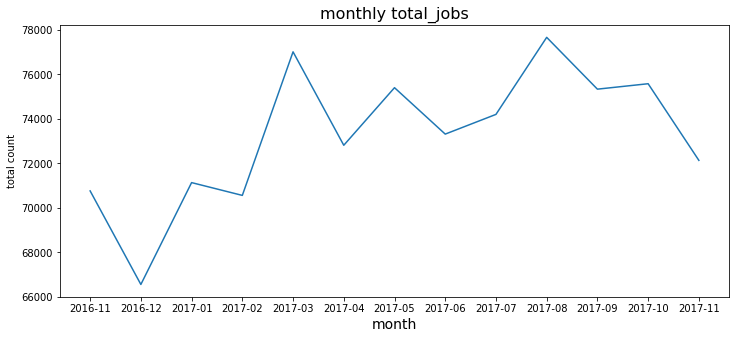

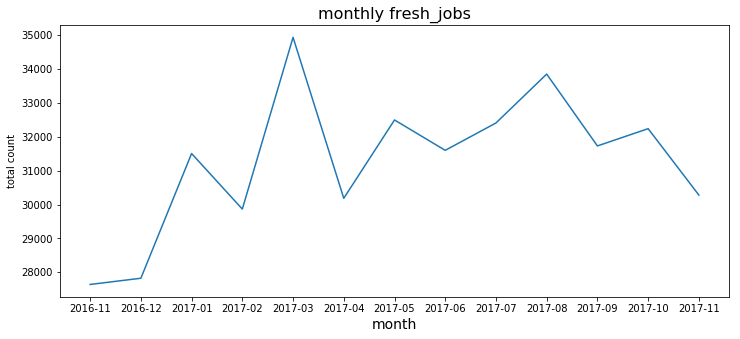

In [251]:
plot_month(monthly,'total_jobs','month','total count')
plt.savefig('monthly_totaljob_US.png')
plot_month(monthly,'fresh_jobs','month','total count')
plt.savefig('monthly_freshjob_US.png')

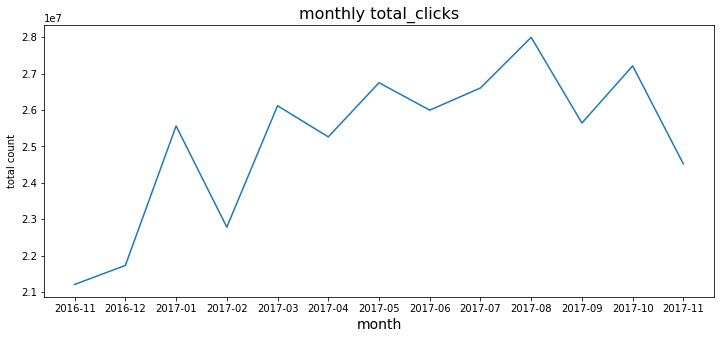

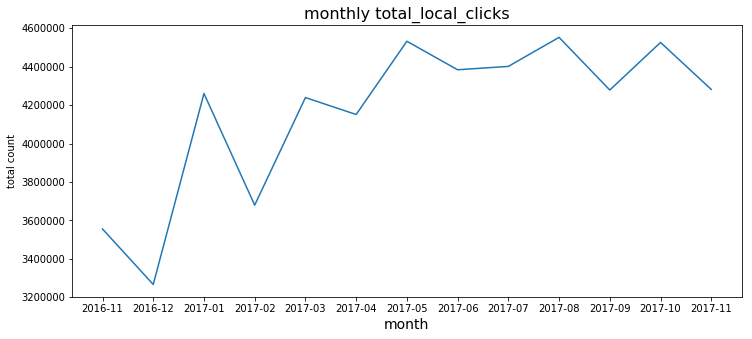

In [105]:
plot_month(monthly,'total_clicks','month','total count')
plot_month(monthly,'total_local_clicks','month','total count')

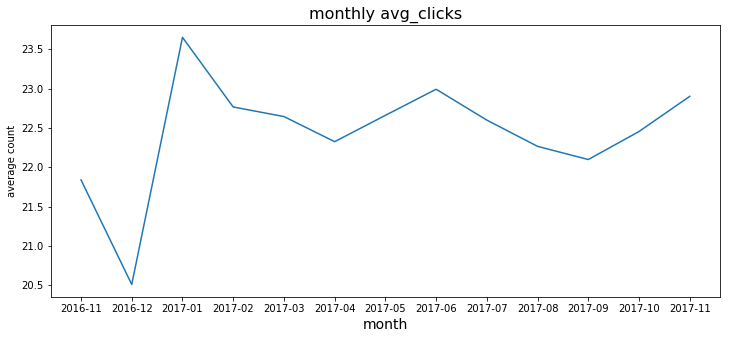

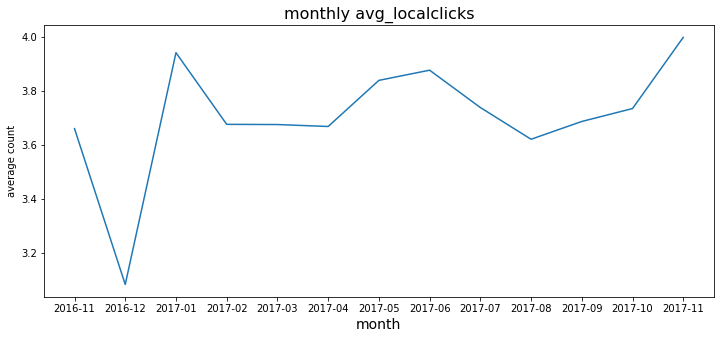

In [107]:
plot_month(monthly,'avg_clicks','month','average count')
plot_month(monthly,'avg_localclicks','month','average count')

In [56]:
# Playing with daily data
daily = pd.read_csv('datafest18_dailyjob.csv')

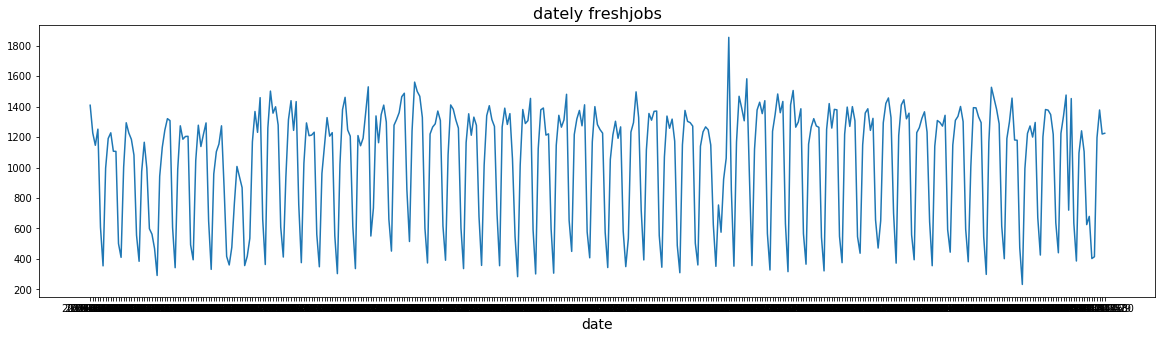

In [65]:
plot_month(daily,'freshjobs','date')

In [71]:
print('unique jobs', df['jobId'].nunique())
print('unique company',df['companyId'].nunique())
print('unique job category',df['normTitleCategory'].nunique())
print('unique job title',df['normTitle'].nunique())


unique jobs 520434
unique company 150993
unique job category 57
unique job title 6391


## Analyze data by geographical locations

In [47]:
# Aggregate data by state, year, status, and job. Order by and print out top 3 job counts. 
df1 = df[(df['country']=='US')&(~df['stateProvince'].isin(['AS','FM','GU','UNKNOWN','UM','MP','PR','VI']))].groupby(['stateProvince','normTitleCategory'])['jobId'].nunique().reset_index(name='count')
df1_agg = df1.groupby(['stateProvince','normTitleCategory']).agg({'count':sum})
g = df1_agg['count'].groupby(level=0, group_keys=False).nlargest(3).reset_index()
g.head()
#Create a text column that aggregate job name and count
g['text'] = g['normTitleCategory'].apply(lambda x:x.replace(',','')) + ' ' + g['count'].map(str)
g1 = g.groupby('stateProvince')['text'].apply('<br>'.join).reset_index()
g1['text'] = g1['stateProvince'] + '<br>' + g1['text']
# Create a column of total counts by state, year, and status
g1['total'] = g.groupby('stateProvince')['count'].sum().reset_index()['count']
g1.head()

,stateProvince,normTitleCategory,count
0,AK,mednurse,116
1,AK,install,50
2,AK,retail,48
3,AL,management,459
4,AL,driver,450


,stateProvince,text,total
0,AK,AK<br>mednurse 116<br>install 50<br>retail 48,214
1,AL,AL<br>management 459<br>driver 450<br>retail 349,1258
2,AR,AR<br>driver 296<br>mednurse 291<br>management...,846
3,AZ,AZ<br>mednurse 672<br>management 618<br>food 570,1860
4,CA,CA<br>management 3753<br>food 3131<br>mednurse...,9957


In [52]:
# left join two tables together on 'CODE'
g1_census = pd.merge(g1,census17,how='left',on=['stateProvince'])
# Calculate the fraction of H1B in total population for each state in each year
g1_census['Percent'] = g1_census['total']/g1_census['Pop'] * 100
g1_census.head()

,stateProvince,text,total,Pop,Percent
0,AK,AK<br>mednurse 116<br>install 50<br>retail 48,214,739795,0.028927
1,AL,AL<br>management 459<br>driver 450<br>retail 349,1258,4874747,0.025806
2,AR,AR<br>driver 296<br>mednurse 291<br>management...,846,3004279,0.028160
3,AZ,AZ<br>mednurse 672<br>management 618<br>food 570,1860,7016270,0.026510
4,CA,CA<br>management 3753<br>food 3131<br>mednurse...,9957,39536653,0.025184


In [53]:
def geoplot_year_2(df,loc,values,title,legend):
    """
    This function plot a geographical map of job distribution across states 
    df is the processed data frame 
    loc: state code
    values: the column of interest
    legend: of the color bar
    title: title of the plot
    """
    
    data = dict(type='choropleth',
            colorscale = 'YIOrRd',
            locations = df[loc],
            z = df[values],
            locationmode = 'USA-states',
            text = df['text'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
            colorbar = {'title':legend}
            ) 
    layout = dict(title = title,
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)')
             )
    choromap = go.Figure(data = [data],layout = layout)
    iplot(choromap)

In [55]:
geoplot_year_2(g1_census,'stateProvince','Percent','Normalized total jobs to state population','%')

In [59]:
by_state = df[(df['country']=='US')&(~df['stateProvince'].isin(['AS','FM','GU','UNKNOWN','UM','MP','PR','VI']))].groupby('stateProvince')['jobId'].nunique().reset_index(name='total_jobs')
by_state_totalclicks = df[(df['country']=='US')&(~df['stateProvince'].isin(['AS','FM','GU','UNKNOWN','UM','MP','PR','VI']))].groupby('stateProvince')['clicks'].sum().reset_index(name='total_clicks')
by_state_localclicks = df[(df['country']=='US')&(~df['stateProvince'].isin(['AS','FM','GU','UNKNOWN','UM','MP','PR','VI']))].groupby('stateProvince')['localClicks'].sum().reset_index(name='total_localclicks')
by_state = pd.merge(by_state,by_state_totalclicks,on=['stateProvince'])
by_state = pd.merge(by_state,by_state_localclicks,on=['stateProvince'])

In [60]:
by_state.head()

,stateProvince,total_jobs,total_clicks,total_localclicks
0,AK,757,445803,86008
1,AL,4568,3140817,546187
2,AR,2876,1730052,267521
3,AZ,8933,5268169,1002154
4,CA,47329,29304827,4151517


In [50]:
# Dictionary of state codes. This is used to encode states in our data set
us_state_abbrev = {
    'alabama': 'AL',
    'alaska': 'AK',
    'arizona': 'AZ',
    'arkansas': 'AR',
    'california': 'CA',
    'colorado': 'CO',
    'connecticut': 'CT',
    'delaware': 'DE',
    'district of columbia': 'DC',
    'florida': 'FL',
    'georgia': 'GA',
    'hawaii': 'HI',
    'idaho': 'ID',
    'illinois': 'IL',
    'indiana': 'IN',
    'iowa': 'IA',
    'kansas': 'KS',
    'kentucky': 'KY',
    'louisiana': 'LA',
    'maine': 'ME',
    'maryland': 'MD',
    'massachusetts': 'MA',
    'michigan': 'MI',
    'minnesota': 'MN',
    'mississippi': 'MS',
    'missouri': 'MO',
    'montana': 'MT',
    'nebraska': 'NE',
    'nevada': 'NV',
    'new hampshire': 'NH',
    'new jersey': 'NJ',
    'new mexico': 'NM',
    'new york': 'NY',
    'north carolina': 'NC',
    'north dakota': 'ND',
    'ohio': 'OH',
    'oklahoma': 'OK',
    'oregon': 'OR',
    'pennsylvania': 'PA',
    'rhode island': 'RI',
    'south carolina': 'SC',
    'south dakota': 'SD',
    'tennessee': 'TN',
    'texas': 'TX',
    'utah': 'UT',
    'vermont': 'VT',
    'virginia': 'VA',
    'washington': 'WA',
    'west virginia': 'WV',
    'wisconsin': 'WI',
    'wyoming': 'WY',
}

# Function to encode the states
def code_conversion(df,col):
    Code = []
    for state in df[col]:
        if state.lower().strip(' ') in us_state_abbrev:
            Code.append(us_state_abbrev[state.lower().strip(' ')])
        else:
            Code.append('Null')
    df['CODE'] = Code
# Import census data of estimated state population from 2010 to 2017
census = pd.read_csv('nst-est2017-popchg2010_2017.csv')
# Get data from 2011-2016 only
census.drop(['STATE','ESTIMATESBASE2010'],1,inplace=True)
# Change NAME column to STATE
census = census.rename(columns = {'NAME':'STATE'})
# Encode States
code_conversion(census,'STATE')
# Pivot census table to get population in each year for each state
keys = [c for c in census if c.startswith('POP')]
census = pd.melt(census, id_vars=['STATE','CODE'], value_vars=keys, value_name='POP')
census['YEAR'] = census['variable'].apply(lambda x:int(x[-4:]))
#Get pop data for 2017
census17 = census[census['YEAR'] == 2017][['CODE','POP']]
census17.columns = ['stateProvince','Pop']
census17.head()

,stateProvince,Pop
364,AL,4874747
365,AK,739795
366,AZ,7016270
367,AR,3004279
368,CA,39536653


In [61]:
by_state = pd.merge(by_state,census17,on=['stateProvince'])
by_state['normalized_jobs'] = round(by_state['total_jobs']/by_state['Pop']*100,2)
by_state['normalized_localclicks'] = round(by_state['total_localclicks']/by_state['Pop'],2)
by_state['local_fraction'] = round(by_state['total_localclicks']/by_state['total_clicks'],2)
by_state['normalized_totalclicks'] = round(by_state['total_clicks']/by_state['Pop'],2)
by_state = pd.merge(by_state,g1_census[['stateProvince','text']],on=['stateProvince'])

In [25]:
import plotly.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

In [68]:
def geoplot_year(df,loc,values,title,legend):
    """
    This function plot a geographical map of job distribution across states 
    df is the processed data frame 
    loc: state code
    values: the column of interest
    legend: of the color bar
    title: title of the plot
    """
    
    data = dict(type='choropleth',
            colorscale = 'YIOrRd',
            locations = df[loc],
            z = df[values],
            locationmode = 'USA-states',
            text = df['text'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
            colorbar = {'title':legend}
            ) 
    layout = dict(title = title,
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)')
             )
    choromap = go.Figure(data = [data],layout = layout)
    iplot(choromap)

In [69]:
geoplot_year(by_state,'stateProvince','normalized_jobs','Normalized total jobs to state population','%')
geoplot_year(by_state,'stateProvince','normalized_localclicks','Normalized total # of local clicks to state population','fraction')
geoplot_year(by_state,'stateProvince','normalized_totalclicks','Normalized total # of total clicks to state population','fraction')


In [70]:
geoplot_year(by_state,'stateProvince','total_jobs','Raw total jobs by state','jobs')
geoplot_year(by_state,'stateProvince','total_clicks','Raw total clicks by state','clicks')
geoplot_year(by_state,'stateProvince','total_localclicks','Raw local clicks by state','clicks')
geoplot_year(by_state,'stateProvince','local_fraction','Fraction of local clicks in total clicks by state','fraction')

## Company fragmentation analysis of JobTitle Category

In [32]:
def get_company_table(df,col1,col2,country):
    if country == 'all':
        by_company=df.groupby([col1,col2])['jobId'].nunique().reset_index(name='total_bycompany')
        by_company_total =df.groupby(col1)['jobId'].nunique().reset_index(name='total')
        by_company = pd.merge(by_company,by_company_total,on=[col1])
        by_company['fraction'] = by_company['total_bycompany']/by_company['total']
    else:
        by_company=df[df['country']==country].groupby([col1,col2])['jobId'].nunique().reset_index(name='total_bycompany')
        by_company_total =df[df['country']==country].groupby(col1)['jobId'].nunique().reset_index(name='total')
        by_company = pd.merge(by_company,by_company_total,on=[col1])
        by_company['fraction'] = by_company['total_bycompany']/by_company['total']
    
    return by_company, by_company_total

In [4]:
def get_company_clicks_table(df,country):
    if country == 'all':
        by_company=df.groupby(['normTitleCategory','companyId'])['clicks'].sum().reset_index(name='total_bycompany')
        by_company_total =df.groupby('normTitleCategory')['clicks'].sum().reset_index(name='total')
        by_company = pd.merge(by_company,by_company_total,on=['normTitleCategory'])
        by_company['fraction'] = by_company['total_bycompany']/by_company['total']
    else:
        by_company=df[df['country']==country].groupby(['normTitleCategory','companyId'])['clicks'].sum().reset_index(name='total_bycompany')
        by_company_total =df[df['country']==country].groupby('normTitleCategory')['clicks'].sum().reset_index(name='total')
        by_company = pd.merge(by_company,by_company_total,on=['normTitleCategory'])
        by_company['fraction'] = by_company['total_bycompany']/by_company['total']
    
    return by_company, by_company_total

In [37]:
def fragmentation(df,col,category,num):
    total_percent = df[df[col]== category].sort_values('fraction',ascending=False).head(num)['fraction'].sum()
    return round(total_percent,2)

def plot_heatmap(col,num1,num2,num3,country):
    top1=[]
    top2=[]
    top3=[]
    # Order category by the total spent in that category, descending
    categories_desc = by_company_total.sort_values('total',ascending=False)[col].head(10)
    # Get the fraction of spend that the top 10, 5, and 3 vendors account for in each category
    for category in categories_desc:
        top1.append(fragmentation(by_company,col,category,num1))
        top2.append(fragmentation(by_company,col,category,num2))
        top3.append(fragmentation(by_company,col,category,num3))
        
    # Aggregate these above to a table
    vendor = pd.DataFrame()
    vendor['category'] = categories_desc
    vendor['top %d' %num1] = top1
    vendor['top %d' %num2] = top2
    vendor['top %d' %num3] = top3
    vendor.set_index('category',inplace=True)
    
    # plot heatmap 
    plt.figure(figsize=(10,10))
    sns.heatmap(vendor,annot=True,annot_kws={"size": 14})
    plt.title('Cumulative fraction of jobs by %s companies in top 10 JobTitle category' %country,fontsize=16)
    plt.ylabel('Category',fontsize=14)
    plt.xlabel('Companies',fontsize=14)
    plt.yticks(fontsize=13)
    plt.xticks(fontsize=13)
    #return vendor

In [10]:
by_company_total.sort_values('total',ascending=False).head(10)

,normTitleCategory,total
1,admin,934789
24,management,732534
41,retail,589861
32,mednurse,580735
9,customer,563489
42,sales,494078
18,food,487733
21,install,455817
10,driver,428507
56,warehouse,365573


In [101]:
# Analysis for jobs in the US
#[by_company, by_company_total]=get_company_clicks_table(uniques,'US')
[by_company, by_company_total]=get_company_table(uniques,'normTitleCategory','companyId','US')
#plot_heatmap('companyId',5,10,50,'US')
#plt.savefig('Fragmentation_heatmap_US.png',bbox_inches='tight')

## Cohort analysis of job 

In [105]:
top_cat = by_company_total.sort_values('total',ascending=False)['normTitleCategory'].head(10)
bottom_cat = by_company_total.sort_values('total')['normTitleCategory'].head(10)

In [106]:
monthly_category = df[df['country']=='US'].groupby(['normTitleCategory','month'])['clicks'].sum().reset_index(name='total')
monthly_category_job = df[df['country']=='US'].groupby(['normTitleCategory','month'])['jobId'].nunique().reset_index(name='totaljobs')
monthly_category_avg = df[df['country']=='US'].groupby(['normTitleCategory','month'])['clicks'].mean().reset_index(name='avg_clicks')
monthly_category = pd.merge(monthly_category,monthly_category_job,on=['normTitleCategory','month'])
monthly_category = pd.merge(monthly_category,monthly_category_avg,on=['normTitleCategory','month'])

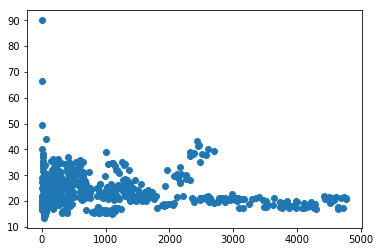

In [247]:
plt.scatter(monthly_category['totaljobs'],monthly_category['avg_clicks'])

In [244]:
monthly_category[(monthly_category['totaljobs']<2500)&(monthly_category['totaljobs']>2000)]['normTitleCategory']

13             admin
14             admin
15             admin
16             admin
18             admin
19             admin
20             admin
21             admin
25             admin
117         customer
120         customer
121         customer
122         customer
123         customer
124         customer
125         customer
126         customer
127         customer
128         customer
129         customer
130           driver
137           driver
140           driver
141           driver
142           driver
274          install
665     techsoftware
667     techsoftware
672     techsoftware
673     techsoftware
714    uncategorized
Name: normTitleCategory, dtype: object

In [104]:
def clicks_by_cat(category):
    sub = monthly_category[monthly_category['normTitleCategory']==category]
    return sub

Text(0.5,1,'Monthly Total Clicks of the bottom 5 JobTitle Categories')

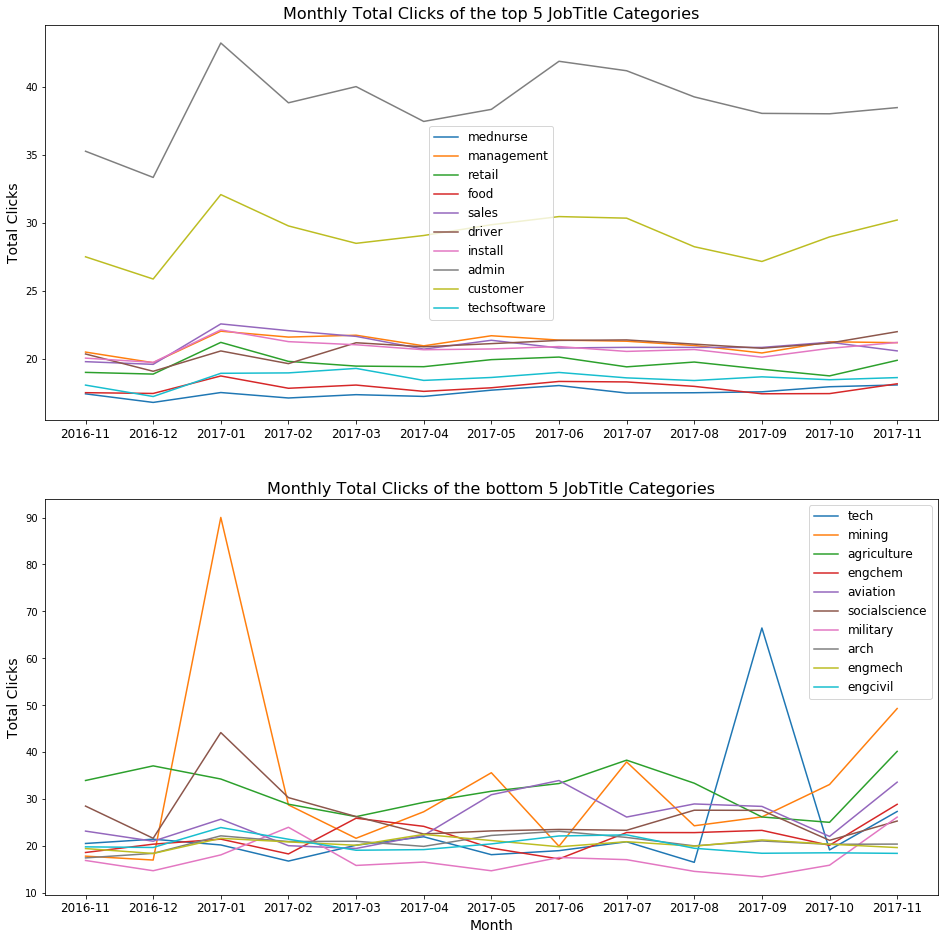

In [107]:
plt.figure(figsize=(16,16))
plt.subplot(211) 
plt.ylabel('Total Clicks', fontsize=14)
plt.title('Monthly Total Clicks of the top 5 JobTitle Categories',fontsize=16)
for cat in top_cat:
    plt.plot(clicks_by_cat(cat)['month'],clicks_by_cat(cat)['avg_clicks'],label=cat)
    plt.legend(loc='best',fontsize=12)
    plt.xticks(fontsize=12)

plt.subplot(212) 
for cat in bottom_cat:
    plt.plot(clicks_by_cat(cat)['month'],clicks_by_cat(cat)['avg_clicks'],label=cat)
    plt.legend(loc='best',fontsize=12)
    plt.xticks(fontsize=12)
plt.xlabel('Month',fontsize=14)
plt.ylabel('Total Clicks', fontsize=14)
plt.title('Monthly Total Clicks of the bottom 5 JobTitle Categories',fontsize=16)

#plt.savefig('Monthly_avgclicks_bycategory.png')

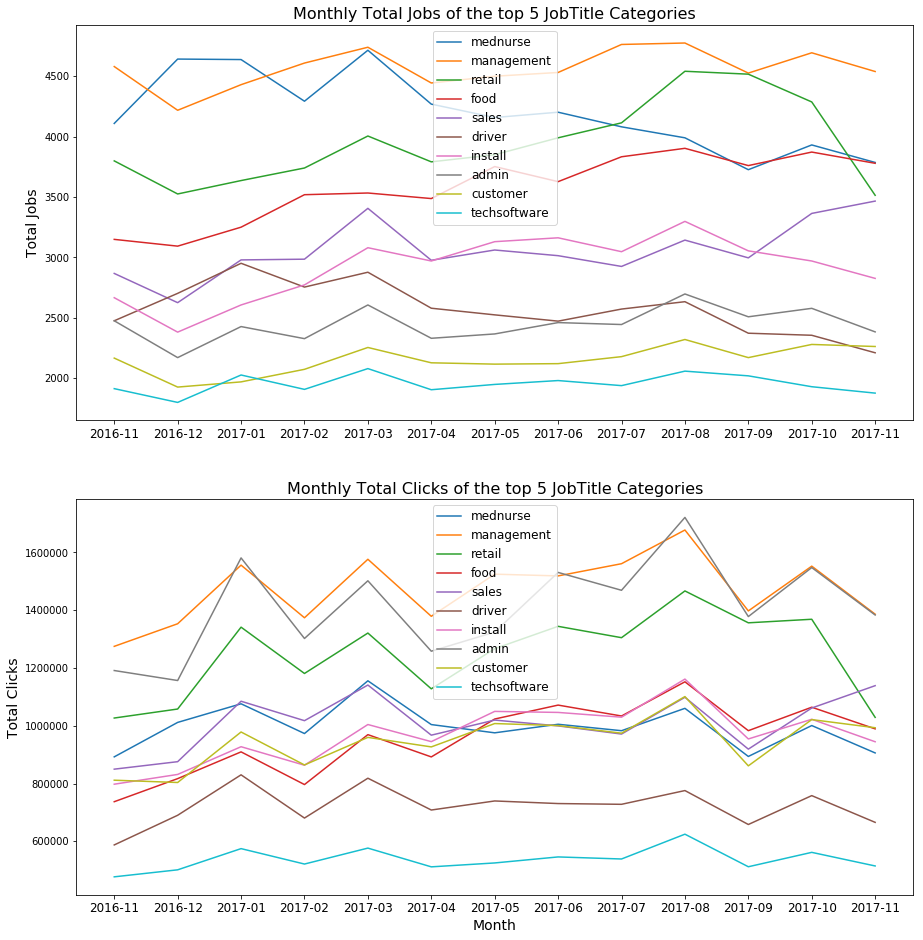

In [108]:
plt.figure(figsize=(15,16))
plt.subplot(211) 
plt.ylabel('Total Jobs', fontsize=14)
plt.title('Monthly Total Jobs of the top 5 JobTitle Categories',fontsize=16)
for cat in top_cat:
    plt.plot(clicks_by_cat(cat)['month'],clicks_by_cat(cat)['totaljobs'],label=cat)
    plt.legend(loc='best',fontsize=12)
    plt.xticks(fontsize=12)

plt.subplot(212) 
plt.ylabel('Total Clicks', fontsize=14)
plt.title('Monthly Total Clicks of the top 5 JobTitle Categories',fontsize=16)
for cat in top_cat:
    plt.plot(clicks_by_cat(cat)['month'],clicks_by_cat(cat)['total'],label=cat)
    plt.legend(loc='best',fontsize=12)
    plt.xticks(fontsize=12)
plt.xlabel('Month',fontsize=14)
plt.savefig('Monthly_bycategory.png')

In [125]:
uniques.columns

Index(['Unnamed: 0', 'date', 'companyId', 'jobId', 'country', 'stateProvince',
       'city', 'avgOverallRating', 'numReviews', 'industry', 'normTitle',
       'normTitleCategory', 'descriptionCharacterLength',
       'descriptionWordCount', 'experienceRequired', 'estimatedSalary',
       'salaryCurrency', 'jobLanguage', 'supervisingJob', 'licenseRequiredJob',
       'educationRequirements', 'clicks', 'localClicks', 'Avg_clicks',
       'Avg_localClicks', 'TotalClicks', 'JobAge', 'TotalLocalClicks'],
      dtype='object')

In [253]:
category_age = uniques[uniques['country']=='US'].groupby('normTitleCategory')['JobAge'].mean().reset_index(name='avg_Age')

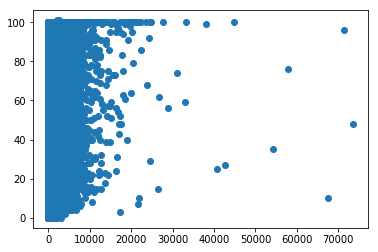

In [267]:
plt.scatter(uniques['TotalClicks'],uniques['JobAge'])

In [274]:
by_education = uniques.groupby(['educationRequirements','normTitleCategory'])['jobId'].size().reset_index()

In [291]:
salary_non0 = uniques[uniques['estimatedSalary']>0]
by_edu = salary_non0.groupby('educationRequirements')['jobId'].size().reset_index(name='TotalJobs')
by_edu = pd.merge(by_edu,salary_non0.groupby('educationRequirements')['estimatedSalary'].mean().reset_index(),on=['educationRequirements'])
by_edu

,educationRequirements,TotalJobs,estimatedSalary
0,High School,94779,30995.969571
1,Higher Education,107266,67354.013387
2,None,239345,46425.503771


In [290]:
by_education = df[df['estimatedSalary']>0].groupby(['educationRequirements','month'])['jobId'].nunique().reset_index(name='TotalJobs')

,educationRequirements,month,TotalJobs
0,High School,2016-11,14060
1,High School,2016-12,12758
2,High School,2017-01,13270
3,High School,2017-02,13193
4,High School,2017-03,14209
5,High School,2017-04,13833
6,High School,2017-05,14082
7,High School,2017-06,13905
8,High School,2017-07,14000
9,High School,2017-08,15048


In [ ]:
by_education['educationRequirements'] == 'High'

In [39]:
secondid = df[df['jobId']=='job0523771']

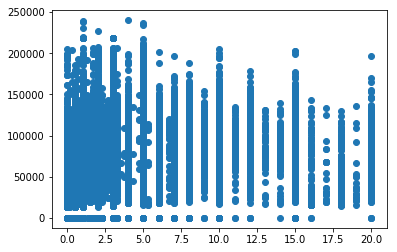

In [113]:
plt.scatter(uniques['experienceRequired'],uniques['estimatedSalary'])

In [ ]:
df.groupby('supervisingJob')['estimatedSalary'].hist()

In [81]:
def hist_plot(df,col,hue,bins):
    plt.figure(figsize=(8,6))
    df[df[hue]==0][col].hist(alpha=0.5,color='red',bins=bins,label=hue+'=0')
    df[df[hue]==1][col].hist(alpha=0.7,color='blue',bins=bins,label=hue+'=1')
    plt.legend()
    plt.xlabel(col)
    print('Average %s of %s = 1 job is' %(col,hue), round(df[df[hue]==1][col].mean(),1))
    print('Average %s of %s = 0 job is' %(col,hue), round(df[df[hue]==0][col].mean(),1))

In [82]:
def hist_plot_2(df,col,category,hues,bins):
    plt.figure(figsize=(8,6))
    for i,hue in enumerate(hues):
        df[df[category]==hue][col].hist(alpha=0.5, bins=bins,label= hue)
        print('Average %s of %s job is' %(col,hue), round(df[df[category]==hue][col].mean(),1))
    plt.legend(fontsize=14,loc='best')
    plt.xlabel(col,fontsize=14)


In [305]:
uniques['educationRequirements'].unique()

array(['None', 'High School', nan, 'Higher Education'], dtype=object)

Average JobAge of management job is 34.0
Average JobAge of techsoftware job is 34.2
Average JobAge of accounting job is 31.7


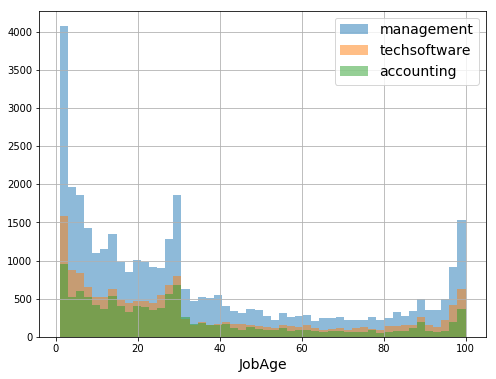

In [98]:
hist_plot_2(uniques[uniques['JobAge']>0],'JobAge','normTitleCategory',['management','techsoftware','accounting'],bins=50)
plt.savefig('Jobage_hist.png')

Average estimatedSalary of None job is 46215.6
Average estimatedSalary of High School job is 30984.9
Average estimatedSalary of Higher Education job is 66658.6


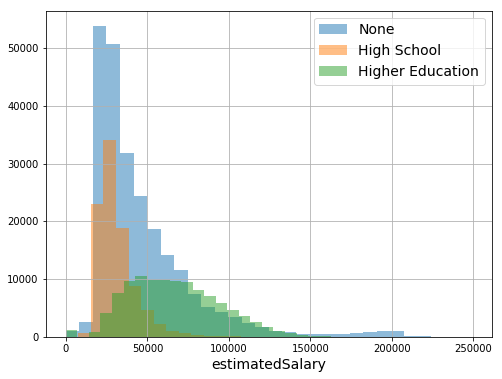

In [323]:
hist_plot_2(uniques,'estimatedSalary','educationRequirements',['None','High School','Higher Education'],bins=30)
plt.savefig('Salary_byedu_level.png')

In [84]:
edu_cat=uniques.groupby(['educationRequirements','normTitleCategory'])['clicks'].sum().reset_index(name='count').set_index(['educationRequirements','normTitleCategory'])

In [85]:
edu_cat['count'].groupby(level=0, group_keys=False).nlargest(3).reset_index()

,educationRequirements,normTitleCategory,count
0,High School,admin,397512
1,High School,customer,268274
2,High School,retail,232588
3,Higher Education,management,339032
4,Higher Education,admin,205822
5,Higher Education,techsoftware,189869
6,None,admin,454820
7,None,mednurse,413838
8,None,food,395619


Average estimatedSalary of supervisingJob = 1 job is 59847.7
Average estimatedSalary of supervisingJob = 0 job is 45951.9


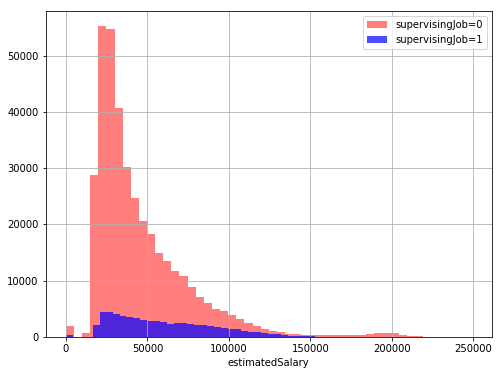

In [296]:
hist_plot(uniques,'estimatedSalary','supervisingJob',bins=50)

Average estimatedSalary of licenseRequiredJob = 1 job is 48549.2
Average estimatedSalary of licenseRequiredJob = 0 job is 47618.1


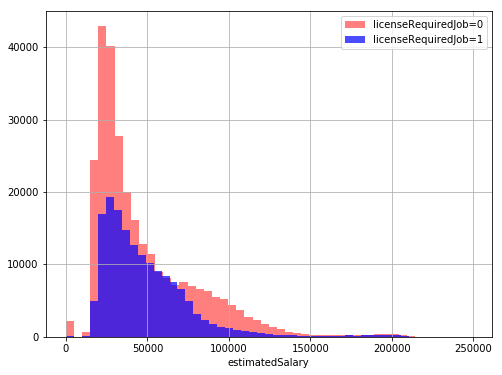

In [294]:
hist_plot(uniques,'estimatedSalary','licenseRequiredJob',bins=50)

In [130]:
uniques['industry'].value_counts()

HEALTH_CARE                                                                         17795
HUMAN_RESOURCES_AND_STAFFING                                                         5308
RETAIL                                                                               4980
CONSULTING_AND_BUSINESS_SERVICES                                                     4094
TRANSPORT_AND_FREIGHT                                                                3135
EDUCATION_AND_SCHOOLS                                                                3048
BANKS_AND_FINANCIAL_SERVICES                                                         2024
RESTAURANTS_TRAVEL_AND_LEISURE                                                       1948
FOOD_AND_BEVERAGES                                                                   1521
GOVERNMENT                                                                           1375
INDUSTRIAL_MANUFACTURING                                                             1316
AUTO      

In [126]:
uniques.columns

Index(['Unnamed: 0', 'date', 'companyId', 'jobId', 'country', 'stateProvince',
       'city', 'avgOverallRating', 'numReviews', 'industry', 'normTitle',
       'normTitleCategory', 'descriptionCharacterLength',
       'descriptionWordCount', 'experienceRequired', 'estimatedSalary',
       'salaryCurrency', 'jobLanguage', 'supervisingJob', 'licenseRequiredJob',
       'educationRequirements', 'jobAgeDays', 'clicks', 'localClicks'],
      dtype='object')

In [14]:
uniques['date'].max()

'2017-11-30'

In [ ]:
def boxplot(df,col):
    
    data_to_plot = [df[df['converted']==0][col],df[df['converted']==1][col]]
    # Create a figure instance
    fig = plt.figure(figsize=(9, 6))
    # Create an axes instance
    ax = fig.add_subplot(111)
    # Create the boxplot
    ax.boxplot(data_to_plot)
    ax.set_xticklabels(['non-converted', 'converted'],fontsize=14)
    plt.ylabel(col,fontsize=14)
    
def count_plot(df,col):
    plt.figure(figsize=(10,5))
    sns.countplot(x=col,hue='converted',data=df,palette='Set1')
    